In [1]:
#importing necessary libraries
import numpy as np#for mathematical calculation
import pandas as pd#for datasets
import matplotlib.pyplot as plt#for visualization

In [2]:
#Loading Dataset
df=pd.read_csv("Salary_Dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)#droping unnecessary column

In [7]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [9]:
df.isnull().sum()#checking for null values

YearsExperience    0
Salary             0
dtype: int64

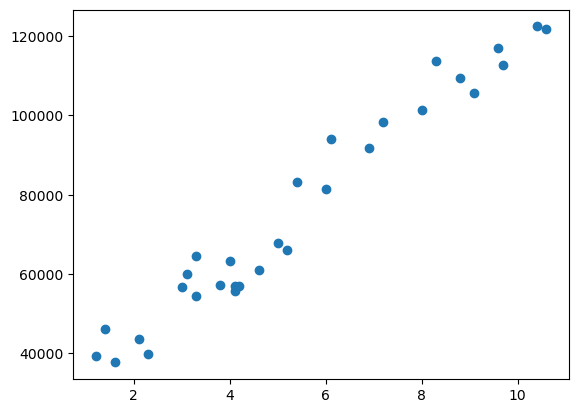

In [11]:
#before training the model
plt.scatter(df['YearsExperience'],df['Salary'])

In [13]:
#Train_Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.3)

In [14]:
X_train

,YearsExperience
20,6.9
9,3.8
25,9.1
8,3.3
27,9.7
11,4.1
19,6.1
7,3.3
22,8.0
13,4.2


In [17]:
X_test

,YearsExperience
2,1.6
5,3.0
15,5.0
10,4.0
24,8.8
12,4.1
4,2.3
29,10.6
28,10.4


In [19]:
Y_train

20     91739.0
9      57190.0
25    105583.0
8      64446.0
27    112636.0
11     55795.0
19     93941.0
7      54446.0
22    101303.0
13     57082.0
3      43526.0
14     61112.0
18     81364.0
21     98274.0
0      39344.0
16     66030.0
17     83089.0
26    116970.0
23    113813.0
1      46206.0
6      60151.0
Name: Salary, dtype: float64

In [21]:
Y_test

2      37732.0
5      56643.0
15     67939.0
10     63219.0
24    109432.0
12     56958.0
4      39892.0
29    121873.0
28    122392.0
Name: Salary, dtype: float64

In [23]:
#Training the model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)

In [25]:
#Evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("R2 Score:",r2_score(Y_test,Y_pred))

MSE: 19759907.1471947
R2 Score: 0.9804596637036995


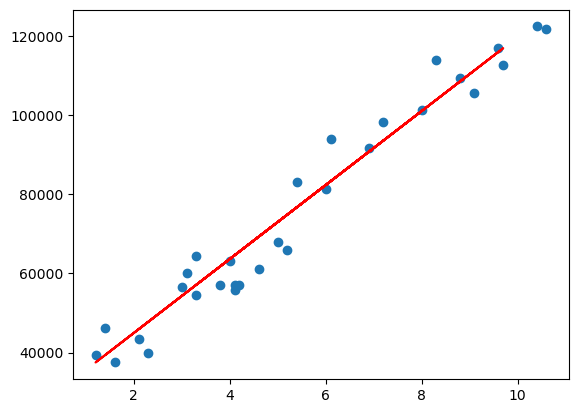

In [27]:
#After training the model
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,LR.predict(X_train),color='red')

In [29]:
X=df.iloc[:,0].values
Y=df.iloc[:,-1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [33]:
#Code from Scratch
class A:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num =((X_train-X_train.mean())*(y_train-y_train.mean())).sum()
        den =((X_train-X_train.mean())**2).sum()
        self.m=num/den
        self.b=y_train.mean()-(self.m*X_train.mean())
        
    def predict(self,X_test):
        print(X_test)
        return self.m*X_test+self.b
  
        

In [35]:
LR=A()
LR.fit(X_train,Y_train)


In [37]:
Y_pred=LR.predict(X_test)


[8.  3.1 6.1 9.7 3.3 1.4 9.1 4.6 4. ]


In [40]:
#Evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("R2 Score:",r2_score(Y_test,Y_pred))

MSE: 836095674.247438
R2 Score: 0.17319496853018213
